In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

pd.set_option('display.max_columns',200)

In [8]:
data=pd.read_csv('player_stats.csv')
df=data.copy()

In [10]:
df.head()

,Rank,Player,Nationality,Position,Club,Age,BirthYear,MatchesPlayed,MatchesStarted,MinutesPlayed,MatchesPlayed_90s,Goals_Total,Assists_Total,GoalsPlusAssists,NonPenaltyGoals,PenaltyGoals,PenaltyAttempts,YellowCards,RedCards,xG_Total,NonPenalty_xG,xAG_Total,NonPenalty_xG_plus_xAG,ProgressiveCarries,ProgressivePasses,ProgressivePassesReceived,Goals_Total_per90,Assists_Total_per90,GoalsPlusAssists_per90,NonPenaltyGoals_per90,G+A_ExclPK,xG_Total_per90,xAG_Total_per90,xG_plus_xAG,NonPenalty_xG_per90,NonPenalty_xG_plus_xAG_per90
0,1,Max Aarons,ENG,DF,Bournemouth,25.0,2000.0,3,1,86,1.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,8,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2,Joshua Acheampong,ENG,DF,Chelsea,18.0,2006.0,4,2,170,1.9,0,0,0,0,0,0,1,0,0.2,0.2,0.0,0.2,0,8,0,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.12,0.12,0.12
2,3,Tyler Adams,USA,MF,Bournemouth,26.0,1999.0,21,14,1380,15.3,0,3,3,0,0,0,4,0,1.2,1.2,0.8,2.0,11,54,7,0.00,0.20,0.20,0.00,0.20,0.08,0.05,0.13,0.08,0.13
3,4,Tosin Adarabioyo,ENG,DF,Chelsea,27.0,1997.0,18,12,1182,13.1,1,1,2,1,0,0,3,0,0.9,0.9,0.2,1.1,5,34,1,0.08,0.08,0.15,0.08,0.15,0.07,0.02,0.09,0.07,0.09
4,5,Simon Adingra,CIV,"FW,MF",Brighton,23.0,2002.0,22,7,743,8.3,2,1,3,2,0,0,0,0,1.6,1.6,1.4,3.0,27,12,96,0.24,0.12,0.36,0.24,0.36,0.19,0.17,0.36,0.19,0.36


In [9]:
df.columns

Index(['Rank', 'Player', 'Nationality', 'Position', 'Club', 'Age', 'BirthYear',
       'MatchesPlayed', 'MatchesStarted', 'MinutesPlayed', 'MatchesPlayed_90s',
       'Goals_Total', 'Assists_Total', 'GoalsPlusAssists', 'NonPenaltyGoals',
       'PenaltyGoals', 'PenaltyAttempts', 'YellowCards', 'RedCards',
       'xG_Total', 'NonPenalty_xG', 'xAG_Total', 'NonPenalty_xG_plus_xAG',
       'ProgressiveCarries', 'ProgressivePasses', 'ProgressivePassesReceived',
       'Goals_Total_per90', 'Assists_Total_per90', 'GoalsPlusAssists_per90',
       'NonPenaltyGoals_per90', 'G+A_ExclPK', 'xG_Total_per90',
       'xAG_Total_per90', 'xG_plus_xAG', 'NonPenalty_xG_per90',
       'NonPenalty_xG_plus_xAG_per90'],
      dtype='object')

# Checking Missing Values

In [11]:
df.isna().sum()

Rank                            0
Player                          0
Nationality                     1
Position                        0
Club                            0
Age                             1
BirthYear                       1
MatchesPlayed                   0
MatchesStarted                  0
MinutesPlayed                   0
MatchesPlayed_90s               0
Goals_Total                     0
Assists_Total                   0
GoalsPlusAssists                0
NonPenaltyGoals                 0
PenaltyGoals                    0
PenaltyAttempts                 0
YellowCards                     0
RedCards                        0
xG_Total                        0
NonPenalty_xG                   0
xAG_Total                       0
NonPenalty_xG_plus_xAG          0
ProgressiveCarries              0
ProgressivePasses               0
ProgressivePassesReceived       0
Goals_Total_per90               0
Assists_Total_per90             0
GoalsPlusAssists_per90          0
NonPenaltyGoal

In [12]:
df[df.Age.isna()]

,Rank,Player,Nationality,Position,Club,Age,BirthYear,MatchesPlayed,MatchesStarted,MinutesPlayed,MatchesPlayed_90s,Goals_Total,Assists_Total,GoalsPlusAssists,NonPenaltyGoals,PenaltyGoals,PenaltyAttempts,YellowCards,RedCards,xG_Total,NonPenalty_xG,xAG_Total,NonPenalty_xG_plus_xAG,ProgressiveCarries,ProgressivePasses,ProgressivePassesReceived,Goals_Total_per90,Assists_Total_per90,GoalsPlusAssists_per90,NonPenaltyGoals_per90,G+A_ExclPK,xG_Total_per90,xAG_Total_per90,xG_plus_xAG,NonPenalty_xG_per90,NonPenalty_xG_plus_xAG_per90
346,347,Jeremy Monga,NaN,FW,Leicester City,NaN,NaN,1,0,17,0.2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df['Age'].fillna(int(df['Age'].mean()),inplace=True)

C:\Users\agtbe\AppData\Local\Temp\ipykernel_9864\1930370912.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(int(df['Age'].mean()),inplace=True)


In [15]:
df['BirthYear']=df['BirthYear'].fillna(2025-df['Age'])

In [16]:
df[df.Player=='Jeremy Monga']

,Rank,Player,Nationality,Position,Club,Age,BirthYear,MatchesPlayed,MatchesStarted,MinutesPlayed,MatchesPlayed_90s,Goals_Total,Assists_Total,GoalsPlusAssists,NonPenaltyGoals,PenaltyGoals,PenaltyAttempts,YellowCards,RedCards,xG_Total,NonPenalty_xG,xAG_Total,NonPenalty_xG_plus_xAG,ProgressiveCarries,ProgressivePasses,ProgressivePassesReceived,Goals_Total_per90,Assists_Total_per90,GoalsPlusAssists_per90,NonPenaltyGoals_per90,G+A_ExclPK,xG_Total_per90,xAG_Total_per90,xG_plus_xAG,NonPenalty_xG_per90,NonPenalty_xG_plus_xAG_per90
346,347,Jeremy Monga,NaN,FW,Leicester City,25.0,2000.0,1,0,17,0.2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Checking Data types

In [17]:
df.dtypes

Rank                              int64
Player                           object
Nationality                      object
Position                         object
Club                             object
Age                             float64
BirthYear                       float64
MatchesPlayed                     int64
MatchesStarted                    int64
MinutesPlayed                     int64
MatchesPlayed_90s               float64
Goals_Total                       int64
Assists_Total                     int64
GoalsPlusAssists                  int64
NonPenaltyGoals                   int64
PenaltyGoals                      int64
PenaltyAttempts                   int64
YellowCards                       int64
RedCards                          int64
xG_Total                        float64
NonPenalty_xG                   float64
xAG_Total                       float64
NonPenalty_xG_plus_xAG          float64
ProgressiveCarries                int64
ProgressivePasses                 int64


In [18]:
#converting age and birthyear to int
df['Age'] = df['Age'].astype('Int64')  # Pandas nullable int
df['BirthYear'] = df['BirthYear'].astype('Int64')

# Descriptive Statistics

In [19]:
df.describe()

,Rank,Age,BirthYear,MatchesPlayed,MatchesStarted,MinutesPlayed,MatchesPlayed_90s,Goals_Total,Assists_Total,GoalsPlusAssists,NonPenaltyGoals,PenaltyGoals,PenaltyAttempts,YellowCards,RedCards,xG_Total,NonPenalty_xG,xAG_Total,NonPenalty_xG_plus_xAG,ProgressiveCarries,ProgressivePasses,ProgressivePassesReceived,Goals_Total_per90,Assists_Total_per90,GoalsPlusAssists_per90,NonPenaltyGoals_per90,G+A_ExclPK,xG_Total_per90,xAG_Total_per90,xG_plus_xAG,NonPenalty_xG_per90,NonPenalty_xG_plus_xAG_per90
count,559.000000,559.0,559.0,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,280.000000,25.90161,1998.431127,16.787120,12.161002,1092.574240,12.139177,1.583184,1.168157,2.751342,1.481216,0.101968,0.118068,2.359571,0.071556,1.614669,1.520572,1.193202,2.713775,20.812165,40.974955,40.561717,0.134830,0.083703,0.218390,0.130322,0.213810,0.149231,0.095707,0.244866,0.144973,0.240555
std,161.513673,4.407063,4.4159,10.062143,10.264557,875.031103,9.721890,3.098121,1.942817,4.517675,2.734865,0.623879,0.653372,2.384510,0.278043,2.744992,2.443371,1.659346,3.721608,27.388394,44.821303,56.717650,0.563903,0.166154,0.596724,0.561685,0.593538,0.318784,0.127661,0.358515,0.315732,0.354808
min,1.000000,17.0,1985.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.500000,23.0,1996.0,7.000000,2.000000,268.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.000000,0.200000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.040000,0.010000,0.040000
50%,280.000000,26.0,1999.0,18.000000,10.000000,917.000000,10.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.500000,0.500000,0.500000,1.200000,10.000000,26.000000,13.000000,0.000000,0.000000,0.070000,0.000000,0.070000,0.070000,0.060000,0.140000,0.070000,0.140000
75%,419.500000,29.0,2002.0,26.000000,21.000000,1845.000000,20.500000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,4.000000,0.000000,1.750000,1.750000,1.600000,3.700000,30.000000,60.500000,65.000000,0.145000,0.125000,0.290000,0.140000,0.275000,0.190000,0.140000,0.350000,0.170000,0.345000
max,559.000000,39.0,2007.0,31.000000,31.000000,2790.000000,31.000000,27.000000,17.000000,44.000000,19.000000,9.000000,9.000000,12.000000,2.000000,22.500000,18.400000,11.300000,26.800000,166.000000,251.000000,384.000000,11.250000,2.650000,11.250000,11.250000,11.250000,5.060000,1.450000,5.060000,5.060000,5.060000


In [20]:
performance_cols = [
    'Goals_Total', 'Assists_Total', 'GoalsPlusAssists', 'NonPenaltyGoals',
    'PenaltyGoals', 'xG_Total', 'xAG_Total', 'xG_plus_xAG',
    'Goals_Total_per90', 'Assists_Total_per90', 'xG_Total_per90', 'xAG_Total_per90'
]

df[performance_cols].describe()

,Goals_Total,Assists_Total,GoalsPlusAssists,NonPenaltyGoals,PenaltyGoals,xG_Total,xAG_Total,xG_plus_xAG,Goals_Total_per90,Assists_Total_per90,xG_Total_per90,xAG_Total_per90
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
mean,1.583184,1.168157,2.751342,1.481216,0.101968,1.614669,1.193202,0.244866,0.134830,0.083703,0.149231,0.095707
std,3.098121,1.942817,4.517675,2.734865,0.623879,2.744992,1.659346,0.358515,0.563903,0.166154,0.318784,0.127661
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.040000,0.000000,0.000000,0.010000,0.010000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.500000,0.500000,0.140000,0.000000,0.000000,0.070000,0.060000
75%,2.000000,2.000000,3.000000,2.000000,0.000000,1.750000,1.600000,0.350000,0.145000,0.125000,0.190000,0.140000
max,27.000000,17.000000,44.000000,19.000000,9.000000,22.500000,11.300000,5.060000,11.250000,2.650000,5.060000,1.450000


In [21]:
df.describe(include='all')

,Rank,Player,Nationality,Position,Club,Age,BirthYear,MatchesPlayed,MatchesStarted,MinutesPlayed,MatchesPlayed_90s,Goals_Total,Assists_Total,GoalsPlusAssists,NonPenaltyGoals,PenaltyGoals,PenaltyAttempts,YellowCards,RedCards,xG_Total,NonPenalty_xG,xAG_Total,NonPenalty_xG_plus_xAG,ProgressiveCarries,ProgressivePasses,ProgressivePassesReceived,Goals_Total_per90,Assists_Total_per90,GoalsPlusAssists_per90,NonPenaltyGoals_per90,G+A_ExclPK,xG_Total_per90,xAG_Total_per90,xG_plus_xAG,NonPenalty_xG_per90,NonPenalty_xG_plus_xAG_per90
count,559.000000,559,558,559,559,559.0,559.0,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000
unique,NaN,547,64,10,20,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Carlos Alcaraz,ENG,DF,Southampton,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,190,181,34,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,280.000000,NaN,NaN,NaN,NaN,25.90161,1998.431127,16.787120,12.161002,1092.574240,12.139177,1.583184,1.168157,2.751342,1.481216,0.101968,0.118068,2.359571,0.071556,1.614669,1.520572,1.193202,2.713775,20.812165,40.974955,40.561717,0.134830,0.083703,0.218390,0.130322,0.213810,0.149231,0.095707,0.244866,0.144973,0.240555
std,161.513673,NaN,NaN,NaN,NaN,4.407063,4.4159,10.062143,10.264557,875.031103,9.721890,3.098121,1.942817,4.517675,2.734865,0.623879,0.653372,2.384510,0.278043,2.744992,2.443371,1.659346,3.721608,27.388394,44.821303,56.717650,0.563903,0.166154,0.596724,0.561685,0.593538,0.318784,0.127661,0.358515,0.315732,0.354808
min,1.000000,NaN,NaN,NaN,NaN,17.0,1985.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.500000,NaN,NaN,NaN,NaN,23.0,1996.0,7.000000,2.000000,268.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.100000,0.000000,0.200000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.040000,0.010000,0.040000
50%,280.000000,NaN,NaN,NaN,NaN,26.0,1999.0,18.000000,10.000000,917.000000,10.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.500000,0.500000,0.500000,1.200000,10.000000,26.000000,13.000000,0.000000,0.000000,0.070000,0.000000,0.070000,0.070000,0.060000,0.140000,0.070000,0.140000
75%,419.500000,NaN,NaN,NaN,NaN,29.0,2002.0,26.000000,21.000000,1845.000000,20.500000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,4.000000,0.000000,1.750000,1.750000,1.600000,3.700000,30.000000,60.500000,65.000000,0.145000,0.125000,0.290000,0.140000,0.275000,0.190000,0.140000,0.350000,0.170000,0.345000


In [22]:
df.groupby('Position')[performance_cols].mean()

,Goals_Total,Assists_Total,GoalsPlusAssists,NonPenaltyGoals,PenaltyGoals,xG_Total,xAG_Total,xG_plus_xAG,Goals_Total_per90,Assists_Total_per90,xG_Total_per90,xAG_Total_per90
Position,,,,,,,,,,,,
DF,0.508287,0.668508,1.176796,0.508287,0.000000,0.634807,0.748619,0.098177,0.025580,0.037680,0.052376,0.046133
"DF,FW",0.428571,0.857143,1.285714,0.428571,0.000000,0.642857,0.957143,0.265714,0.035714,0.045714,0.064286,0.200000
"DF,MF",0.470588,0.470588,0.941176,0.470588,0.000000,0.376471,0.558824,0.132353,0.054118,0.032353,0.077059,0.056471
FW,4.702381,1.892857,6.595238,4.273810,0.428571,4.459524,1.850000,0.433810,0.279405,0.121905,0.296905,0.137381
"FW,DF",0.833333,0.333333,1.166667,0.833333,0.000000,0.550000,0.433333,0.270000,0.298333,0.095000,0.151667,0.120000
"FW,MF",2.448276,2.051724,4.500000,2.344828,0.103448,2.468966,1.877586,0.434483,0.195172,0.228966,0.269483,0.165862
GK,0.000000,0.170732,0.170732,0.000000,0.000000,0.002439,0.075610,0.003659,0.000000,0.006341,0.000000,0.003659
MF,1.214286,1.294643,2.508929,1.151786,0.062500,1.357143,1.405357,0.302054,0.169375,0.075446,0.180357,0.121339
"MF,DF",1.090909,1.181818,2.272727,1.090909,0.000000,1.109091,1.172727,0.199091,0.596364,0.065455,0.104545,0.092727


In [24]:
df.groupby('Club')[performance_cols].sum().sort_values('Goals_Total', ascending=False)


,Goals_Total,Assists_Total,GoalsPlusAssists,NonPenaltyGoals,PenaltyGoals,xG_Total,xAG_Total,xG_plus_xAG,Goals_Total_per90,Assists_Total_per90,xG_Total_per90,xAG_Total_per90
Club,,,,,,,,,,,,
Liverpool,72,54,126,63,9,69.8,49.9,7.33,3.55,3.29,4.47,2.83
Manchester City,56,41,97,54,2,55.0,44.6,6.82,4.45,2.43,3.95,2.85
Tottenham,55,43,98,53,2,51.5,38.8,6.76,3.57,5.89,3.84,2.91
Arsenal,54,43,97,52,2,50.5,38.0,8.82,3.42,2.89,5.81,2.98
Chelsea,53,41,94,50,3,59.6,45.6,13.33,3.00,3.75,9.11,4.25
Brentford,51,32,83,46,5,48.5,34.9,5.14,2.30,1.54,2.96,2.19
Newcastle Utd,51,38,89,48,3,51.2,36.9,5.48,2.78,2.13,3.27,2.24
Bournemouth,50,37,87,44,6,58.3,38.8,7.76,3.24,2.42,4.58,3.21
Nott'ham Forest,50,36,86,47,3,39.5,28.6,4.59,2.75,2.13,2.59,2.00


In [25]:
df.groupby('Club')[performance_cols].mean().sort_values('Goals_Total', ascending=False)


,Goals_Total,Assists_Total,GoalsPlusAssists,NonPenaltyGoals,PenaltyGoals,xG_Total,xAG_Total,xG_plus_xAG,Goals_Total_per90,Assists_Total_per90,xG_Total_per90,xAG_Total_per90
Club,,,,,,,,,,,,
Liverpool,3.000000,2.250000,5.250000,2.625000,0.375000,2.908333,2.079167,0.305417,0.147917,0.137083,0.186250,0.117917
Arsenal,2.250000,1.791667,4.041667,2.166667,0.083333,2.104167,1.583333,0.367500,0.142500,0.120417,0.242083,0.124167
Nott'ham Forest,2.173913,1.565217,3.739130,2.043478,0.130435,1.717391,1.243478,0.199565,0.119565,0.092609,0.112609,0.086957
Newcastle Utd,2.125000,1.583333,3.708333,2.000000,0.125000,2.133333,1.537500,0.228333,0.115833,0.088750,0.136250,0.093333
Manchester City,1.931034,1.413793,3.344828,1.862069,0.068966,1.896552,1.537931,0.235172,0.153448,0.083793,0.136207,0.098276
Brentford,1.888889,1.185185,3.074074,1.703704,0.185185,1.796296,1.292593,0.190370,0.085185,0.057037,0.109630,0.081111
Chelsea,1.827586,1.413793,3.241379,1.724138,0.103448,2.055172,1.572414,0.459655,0.103448,0.129310,0.314138,0.146552
Bournemouth,1.785714,1.321429,3.107143,1.571429,0.214286,2.082143,1.385714,0.277143,0.115714,0.086429,0.163571,0.114643
Tottenham,1.774194,1.387097,3.161290,1.709677,0.064516,1.661290,1.251613,0.218065,0.115161,0.190000,0.123871,0.093871


# Feature Engineering

In [28]:
def engineer_features(df):
    # Handle division safely
    def safe_divide(a, b):
        return np.where(b != 0, a / b, 0)

    # Conversion Efficiency Metrics
    df['GoalConversion'] = safe_divide(df['Goals_Total'], df['xG_Total'])
    df['AssistEfficiency'] = safe_divide(df['Assists_Total'], df['xAG_Total'])

    # Over/Underperformance
    df['xG_Difference'] = df['Goals_Total'] - df['xG_Total']
    df['xAG_Difference'] = df['Assists_Total'] - df['xAG_Total']

    # Finishing Tiers
    df['FinishingTier'] = pd.cut(
        df['xG_Difference'],
        bins=[-np.inf, -2, 0, 2, np.inf],
        labels=['Underperforming', 'Expected', 'Good Finisher', 'Elite']
    )

    # Per 90-minute Ratios (in case not already present)
    df['Goals_per90_calc'] = safe_divide(df['Goals_Total'], df['MatchesPlayed_90s'])
    df['Assists_per90_calc'] = safe_divide(df['Assists_Total'], df['MatchesPlayed_90s'])
    df['xG_per90_calc'] = safe_divide(df['xG_Total'], df['MatchesPlayed_90s'])
    df['xAG_per90_calc'] = safe_divide(df['xAG_Total'], df['MatchesPlayed_90s'])

    # Attacking Score (weighted custom metric)
    df['AttackingScore'] = (
        df['Goals_Total_per90'] * 0.6 +
        df['Assists_Total_per90'] * 0.4 +
        df['xG_Total_per90'] * 0.3
    )

    # Aggression Index (card behavior)
    df['AggressionIndex'] = safe_divide(
        df['YellowCards'] + 2 * df['RedCards'],
        df['MatchesPlayed_90s']
    )

    # Positional Flags
    df['IsForward'] = df['Position'].str.contains('FW', na=False).astype(int)
    df['IsMidfielder'] = df['Position'].str.contains('MF', na=False).astype(int)
    df['IsDefender'] = df['Position'].str.contains('DF', na=False).astype(int)
    df['IsGoalkeeper'] = df['Position'].str.contains('GK', na=False).astype(int)

    return df

In [29]:
df = engineer_features(df)

In [30]:
df.head()

,Rank,Player,Nationality,Position,Club,Age,BirthYear,MatchesPlayed,MatchesStarted,MinutesPlayed,MatchesPlayed_90s,Goals_Total,Assists_Total,GoalsPlusAssists,NonPenaltyGoals,PenaltyGoals,PenaltyAttempts,YellowCards,RedCards,xG_Total,NonPenalty_xG,xAG_Total,NonPenalty_xG_plus_xAG,ProgressiveCarries,ProgressivePasses,ProgressivePassesReceived,Goals_Total_per90,Assists_Total_per90,GoalsPlusAssists_per90,NonPenaltyGoals_per90,G+A_ExclPK,xG_Total_per90,xAG_Total_per90,xG_plus_xAG,NonPenalty_xG_per90,NonPenalty_xG_plus_xAG_per90,GoalConversion,AssistEfficiency,xG_Difference,xAG_Difference,FinishingTier,Goals_per90_calc,Assists_per90_calc,xG_per90_calc,xAG_per90_calc,AttackingScore,AggressionIndex,IsForward,IsMidfielder,IsDefender,IsGoalkeeper
0,1,Max Aarons,ENG,DF,Bournemouth,25,2000,3,1,86,1.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,8,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000,0.000000,0.0,0.0,Expected,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0,0,1,0
1,2,Joshua Acheampong,ENG,DF,Chelsea,18,2006,4,2,170,1.9,0,0,0,0,0,0,1,0,0.2,0.2,0.0,0.2,0,8,0,0.00,0.00,0.00,0.00,0.00,0.12,0.00,0.12,0.12,0.12,0.000000,0.000000,-0.2,0.0,Expected,0.000000,0.000000,0.105263,0.000000,0.036,0.526316,0,0,1,0
2,3,Tyler Adams,USA,MF,Bournemouth,26,1999,21,14,1380,15.3,0,3,3,0,0,0,4,0,1.2,1.2,0.8,2.0,11,54,7,0.00,0.20,0.20,0.00,0.20,0.08,0.05,0.13,0.08,0.13,0.000000,3.750000,-1.2,2.2,Expected,0.000000,0.196078,0.078431,0.052288,0.104,0.261438,0,1,0,0
3,4,Tosin Adarabioyo,ENG,DF,Chelsea,27,1997,18,12,1182,13.1,1,1,2,1,0,0,3,0,0.9,0.9,0.2,1.1,5,34,1,0.08,0.08,0.15,0.08,0.15,0.07,0.02,0.09,0.07,0.09,1.111111,5.000000,0.1,0.8,Good Finisher,0.076336,0.076336,0.068702,0.015267,0.101,0.229008,0,0,1,0
4,5,Simon Adingra,CIV,"FW,MF",Brighton,23,2002,22,7,743,8.3,2,1,3,2,0,0,0,0,1.6,1.6,1.4,3.0,27,12,96,0.24,0.12,0.36,0.24,0.36,0.19,0.17,0.36,0.19,0.36,1.250000,0.714286,0.4,-0.4,Good Finisher,0.240964,0.120482,0.192771,0.168675,0.249,0.000000,1,1,0,0


# Correlation Analysis

In [31]:
df.corr(numeric_only=True).round(2)

,Rank,Age,BirthYear,MatchesPlayed,MatchesStarted,MinutesPlayed,MatchesPlayed_90s,Goals_Total,Assists_Total,GoalsPlusAssists,NonPenaltyGoals,PenaltyGoals,PenaltyAttempts,YellowCards,RedCards,xG_Total,NonPenalty_xG,xAG_Total,NonPenalty_xG_plus_xAG,ProgressiveCarries,ProgressivePasses,ProgressivePassesReceived,Goals_Total_per90,Assists_Total_per90,GoalsPlusAssists_per90,NonPenaltyGoals_per90,G+A_ExclPK,xG_Total_per90,xAG_Total_per90,xG_plus_xAG,NonPenalty_xG_per90,NonPenalty_xG_plus_xAG_per90,GoalConversion,AssistEfficiency,xG_Difference,xAG_Difference,Goals_per90_calc,Assists_per90_calc,xG_per90_calc,xAG_per90_calc,AttackingScore,AggressionIndex,IsForward,IsMidfielder,IsDefender,IsGoalkeeper
Rank,1.00,0.09,-0.10,0.04,0.03,0.04,0.04,0.06,0.06,0.07,0.06,0.05,0.05,0.03,0.01,0.07,0.07,0.04,0.07,0.03,0.01,0.06,-0.02,0.08,0.00,-0.02,-0.00,-0.01,-0.00,-0.01,-0.01,-0.01,-0.04,0.04,0.00,0.05,-0.02,0.08,-0.05,0.01,-0.01,-0.07,0.01,0.00,-0.05,0.07
Age,0.09,1.00,-0.99,0.15,0.17,0.17,0.17,0.03,0.05,0.04,0.02,0.06,0.06,0.11,0.03,0.04,0.03,0.04,0.04,-0.07,0.06,-0.03,-0.08,-0.02,-0.08,-0.08,-0.08,-0.08,-0.03,-0.08,-0.08,-0.09,0.02,0.06,-0.01,0.03,-0.08,-0.02,-0.03,-0.02,-0.09,-0.00,-0.12,-0.10,0.00,0.23
BirthYear,-0.10,-0.99,1.00,-0.16,-0.18,-0.18,-0.18,-0.04,-0.06,-0.05,-0.03,-0.07,-0.06,-0.11,-0.03,-0.04,-0.04,-0.05,-0.04,0.06,-0.07,0.02,0.07,0.02,0.07,0.08,0.08,0.07,0.03,0.08,0.08,0.08,-0.02,-0.07,-0.00,-0.04,0.07,0.02,0.02,0.02,0.08,-0.00,0.12,0.10,-0.01,-0.23
MatchesPlayed,0.04,0.15,-0.16,1.00,0.89,0.91,0.91,0.46,0.52,0.54,0.47,0.19,0.20,0.64,0.15,0.50,0.52,0.60,0.61,0.61,0.70,0.58,0.01,0.17,0.06,0.01,0.06,-0.01,0.13,0.03,-0.03,0.02,0.27,0.36,0.04,0.01,0.03,0.18,0.05,0.13,0.04,-0.11,0.06,0.06,-0.10,-0.04
MatchesStarted,0.03,0.17,-0.18,0.89,1.00,0.99,0.99,0.43,0.51,0.51,0.44,0.23,0.24,0.64,0.15,0.47,0.48,0.57,0.57,0.58,0.74,0.52,-0.01,0.09,0.02,-0.02,0.01,-0.06,0.02,-0.05,-0.08,-0.06,0.20,0.31,0.05,0.03,-0.00,0.10,-0.04,0.03,-0.01,-0.14,-0.11,-0.08,0.02,0.08
MinutesPlayed,0.04,0.17,-0.18,0.91,0.99,1.00,1.00,0.43,0.50,0.51,0.44,0.22,0.23,0.64,0.15,0.47,0.47,0.57,0.57,0.58,0.74,0.52,-0.01,0.09,0.02,-0.02,0.01,-0.06,0.03,-0.05,-0.08,-0.06,0.21,0.31,0.05,0.02,-0.00,0.10,-0.03,0.03,-0.01,-0.14,-0.10,-0.08,0.02,0.08
MatchesPlayed_90s,0.04,0.17,-0.18,0.91,0.99,1.00,1.00,0.43,0.50,0.51,0.44,0.22,0.23,0.64,0.15,0.46,0.47,0.57,0.57,0.58,0.74,0.52,-0.01,0.09,0.02,-0.02,0.01,-0.06,0.03,-0.05,-0.08,-0.06,0.21,0.31,0.05,0.02,-0.00,0.10,-0.03,0.03,-0.01,-0.14,-0.10,-0.08,0.02,0.08
Goals_Total,0.06,0.03,-0.04,0.46,0.43,0.43,0.43,1.00,0.58,0.94,0.98,0.65,0.66,0.19,0.02,0.94,0.92,0.62,0.88,0.54,0.32,0.67,0.24,0.24,0.29,0.21,0.27,0.28,0.23,0.34,0.25,0.30,0.35,0.19,0.48,0.11,0.27,0.25,0.40,0.21,0.31,-0.08,0.39,0.01,-0.27,-0.14
Assists_Total,0.06,0.05,-0.06,0.52,0.51,0.50,0.50,0.58,1.00,0.83,0.56,0.45,0.46,0.30,0.06,0.62,0.60,0.88,0.78,0.71,0.55,0.77,0.09,0.54,0.23,0.07,0.22,0.13,0.41,0.26,0.10,0.24,0.19,0.45,0.11,0.52,0.10,0.55,0.19,0.38,0.19,-0.08,0.25,0.14,-0.21,-0.14
GoalsPlusAssists,0.07,0.04,-0.05,0.54,0.51,0.51,0.51,0.94,0.83,1.00,0.92,0.64,0.65,0.26,0.04,0.91,0.88,0.80,0.94,0.67,0.46,0.79,0.20,0.40,0.30,0.18,0.28,0.25,0.34,0.34,0.21,0.31,0.32,0.33,0.38,0.30,0.23,0.41,0.35,0.31,0.29,-0.09,0.38,0.07,-0.28,-0.16


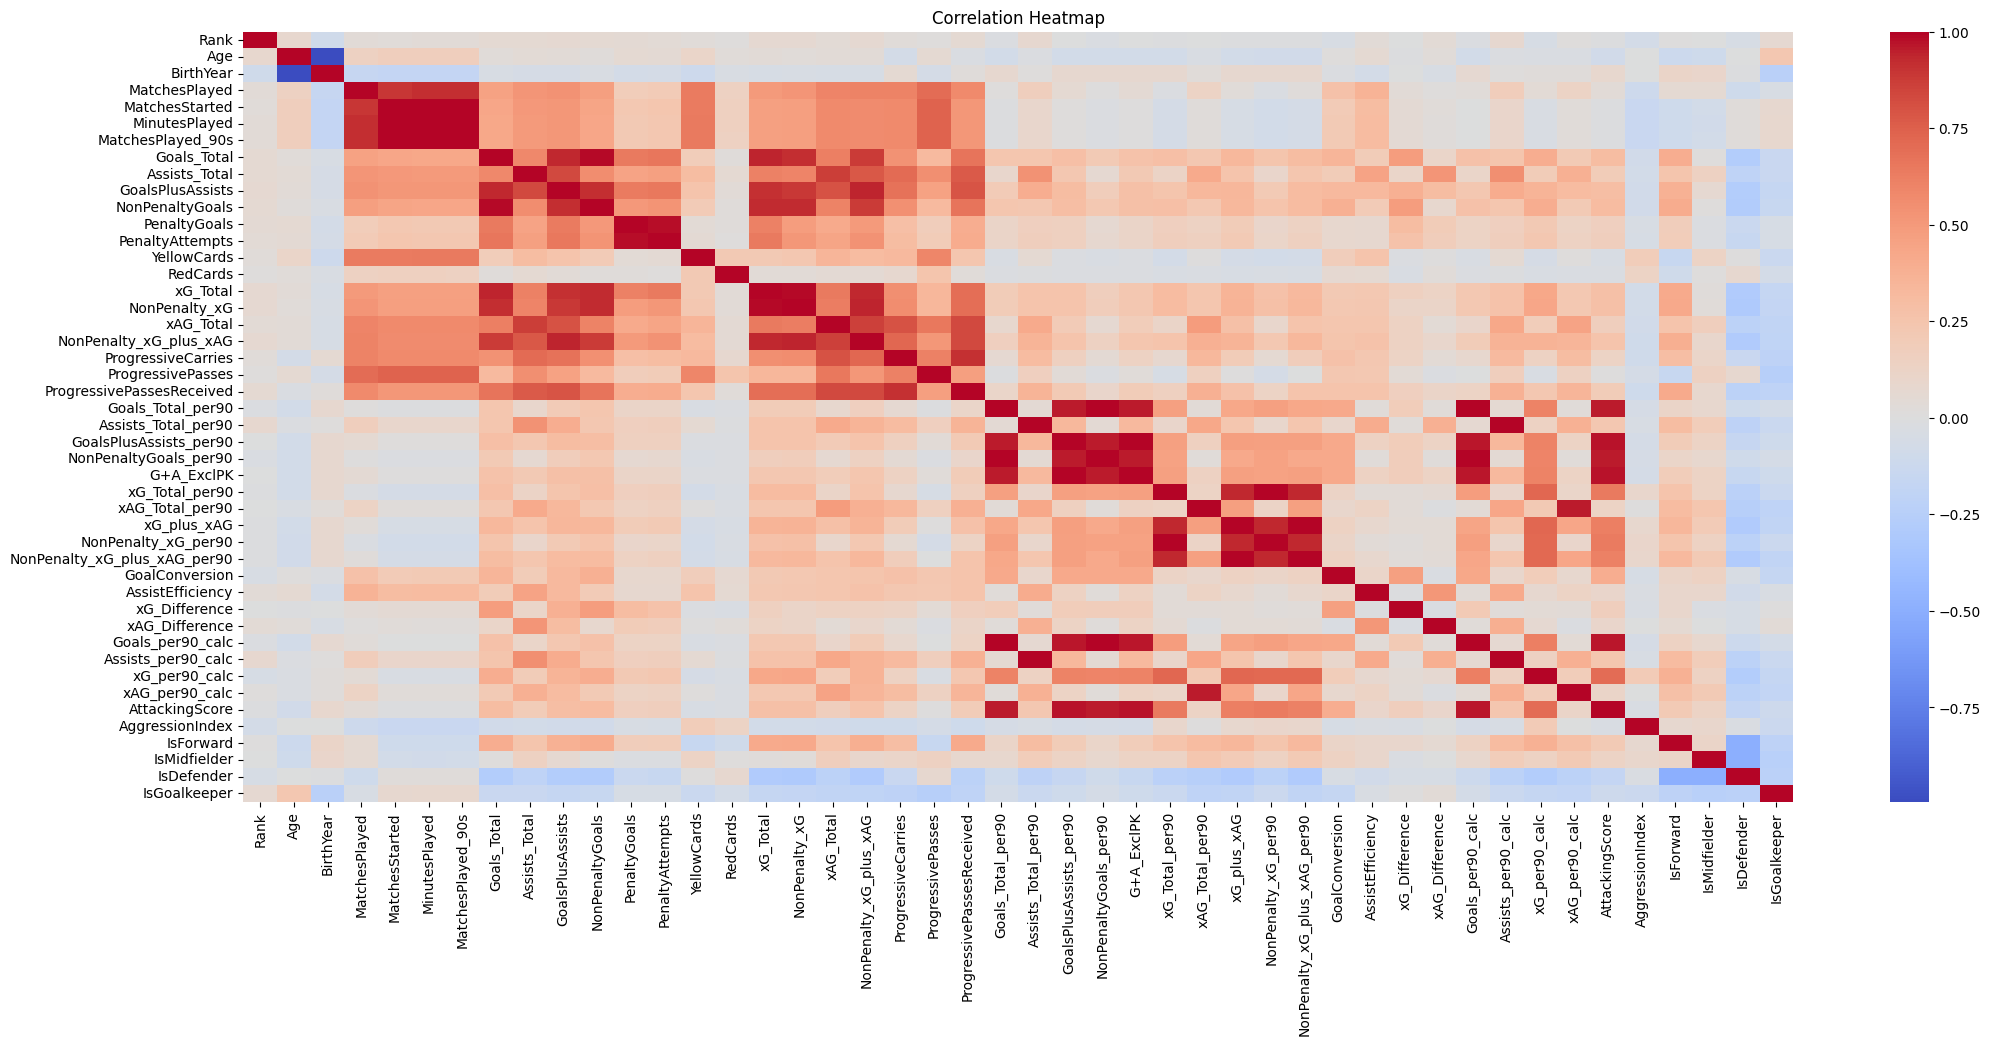

In [35]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Data Analysis


#### 1.Which clubs demonstrate the most efficient player utilization in terms of attacking output relative to expected metrics, and how can this inform recruitment or tactical strategy?

In [36]:
# Step 1: Team-Level Efficiency
def safe_divide(a, b):
    return np.where(b != 0, a / b, 0)
    
team_efficiency = df.groupby('Club').agg({
    'Goals_Total': 'sum',
    'xG_Total': 'sum',
    'Assists_Total': 'sum',
    'xAG_Total': 'sum'
}).reset_index()

team_efficiency['GoalConversion'] = safe_divide(team_efficiency['Goals_Total'], team_efficiency['xG_Total'])
team_efficiency['AssistEfficiency'] = safe_divide(team_efficiency['Assists_Total'], team_efficiency['xAG_Total'])
team_efficiency['xG_Diff'] = team_efficiency['Goals_Total'] - team_efficiency['xG_Total']

C:\Users\agtbe\AppData\Local\Temp\ipykernel_9864\981550194.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_efficiency_sorted, x='Club', y='xG_Diff', palette='coolwarm')


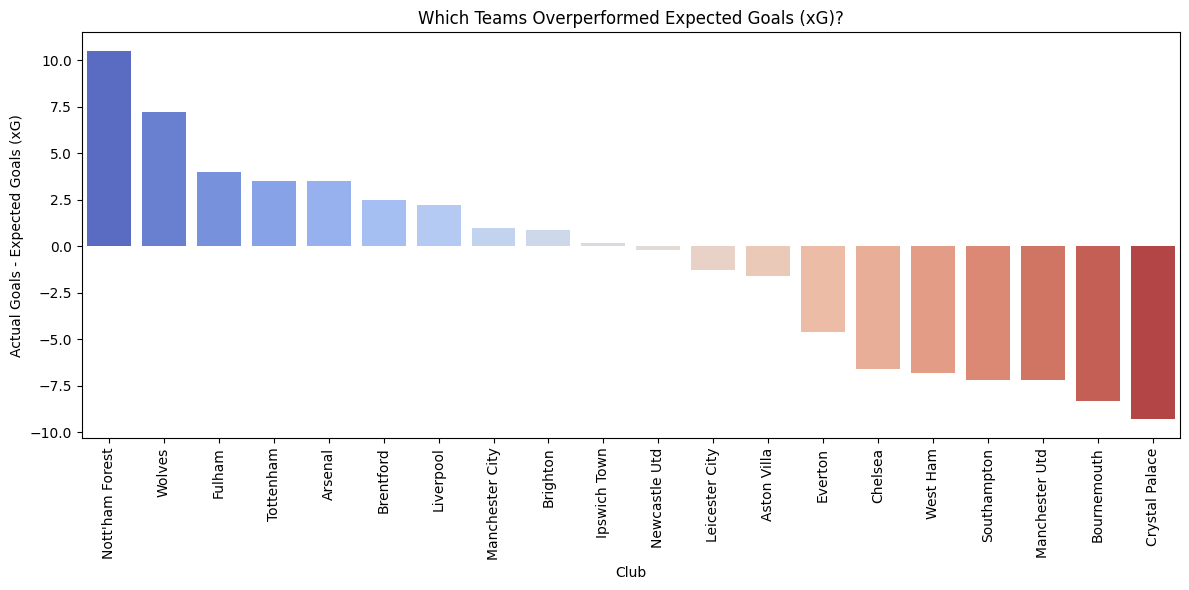

In [37]:
team_efficiency_sorted = team_efficiency.sort_values(by='xG_Diff', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=team_efficiency_sorted, x='Club', y='xG_Diff', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Which Teams Overperformed Expected Goals (xG)?')
plt.ylabel('Actual Goals - Expected Goals (xG)')
plt.xlabel('Club')
plt.tight_layout()
plt.show()

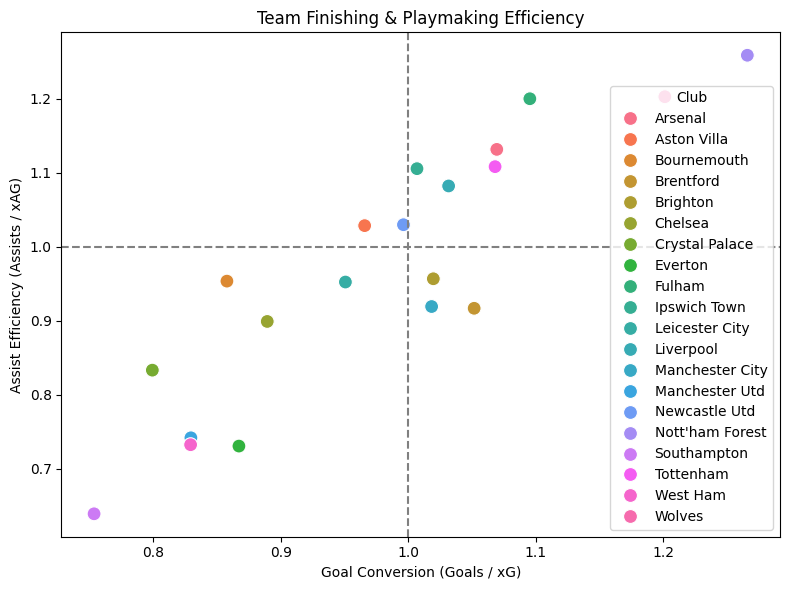

In [38]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=team_efficiency, 
    x='GoalConversion', 
    y='AssistEfficiency', 
    hue='Club',
    s=100
)
plt.title('Team Finishing & Playmaking Efficiency')
plt.xlabel('Goal Conversion (Goals / xG)')
plt.ylabel('Assist Efficiency (Assists / xAG)')
plt.axhline(1, color='grey', linestyle='--')
plt.axvline(1, color='grey', linestyle='--')
plt.tight_layout()
plt.show()

In [39]:
team_efficiency[['Club', 'GoalConversion', 'AssistEfficiency', 'xG_Diff']]\
.sort_values(by='GoalConversion', ascending=False)\
.head(10)

,Club,GoalConversion,AssistEfficiency,xG_Diff
15,Nott'ham Forest,1.265823,1.258741,10.5
19,Wolves,1.201117,1.202749,7.2
8,Fulham,1.095238,1.200000,4.0
0,Arsenal,1.069307,1.131579,3.5
17,Tottenham,1.067961,1.108247,3.5
3,Brentford,1.051546,0.916905,2.5
11,Liverpool,1.031519,1.082164,2.2
4,Brighton,1.019523,0.956790,0.9
12,Manchester City,1.018182,0.919283,1.0
9,Ipswich Town,1.006711,1.105528,0.2


In [41]:
# Step 2: Player Utilization & ROI
high_impact_players = df[
    (df['MatchesPlayed_90s'] < 10) &
    (df['Goals_Total_per90'] > 0.4)
][['Player', 'Club', 'MatchesPlayed_90s', 'Goals_Total_per90', 'AttackingScore']]


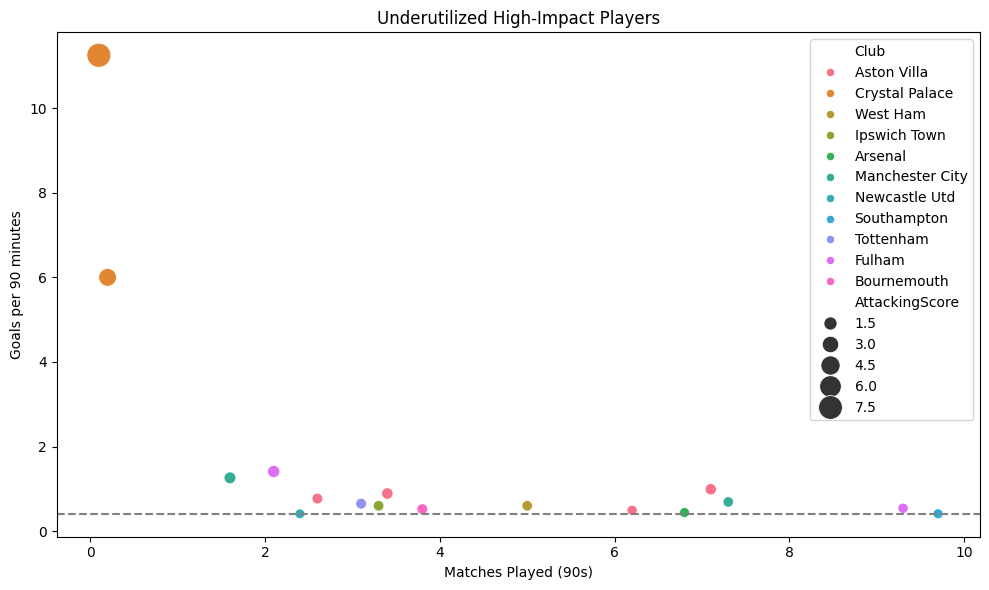

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=high_impact_players,
    x='MatchesPlayed_90s',
    y='Goals_Total_per90',
    hue='Club',
    size='AttackingScore',
    sizes=(50, 300),
    legend='brief'
)
plt.axhline(0.4, linestyle='--', color='grey')
plt.title('Underutilized High-Impact Players')
plt.xlabel('Matches Played (90s)')
plt.ylabel('Goals per 90 minutes')
plt.tight_layout()
plt.show()

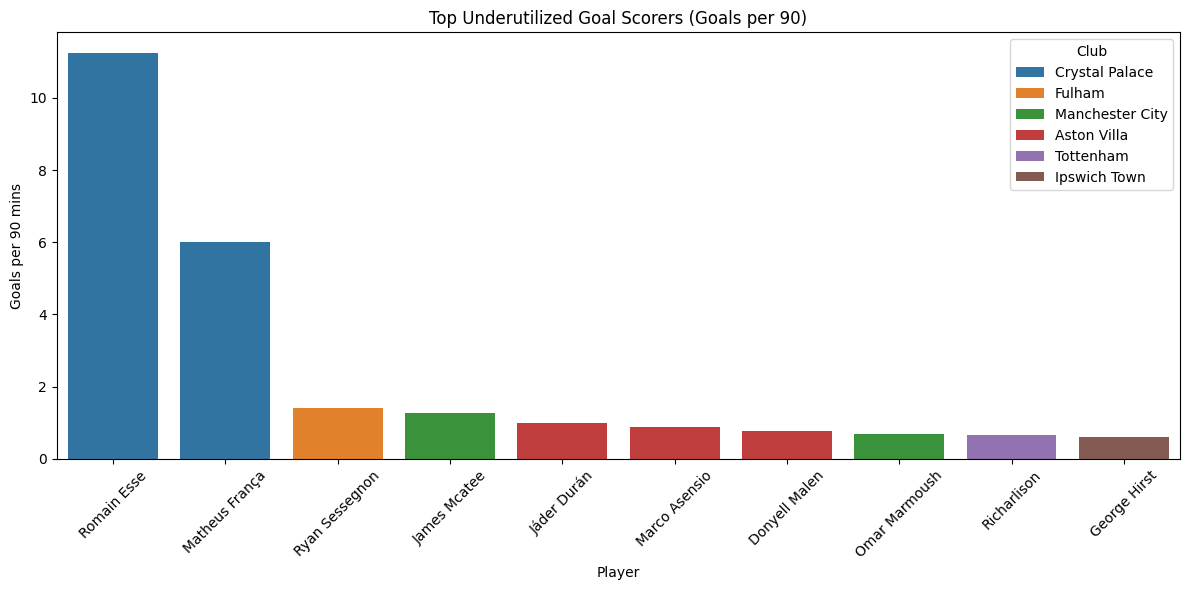

In [43]:
top_impact = high_impact_players.sort_values('Goals_Total_per90', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top_impact, x='Player', y='Goals_Total_per90', hue='Club')
plt.title('Top Underutilized Goal Scorers (Goals per 90)')
plt.ylabel('Goals per 90 mins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [50]:
#Over/Under-Performing Teams Table
team_overperf = team_efficiency[['Club', 'Goals_Total', 'xG_Total', 'xG_Diff']]
team_overperf = team_overperf.sort_values('xG_Diff', ascending=False)
display(team_overperf)

,Club,Goals_Total,xG_Total,xG_Diff
15,Nott'ham Forest,50,39.5,10.5
19,Wolves,43,35.8,7.2
8,Fulham,46,42.0,4.0
17,Tottenham,55,51.5,3.5
0,Arsenal,54,50.5,3.5
3,Brentford,51,48.5,2.5
11,Liverpool,72,69.8,2.2
12,Manchester City,56,55.0,1.0
4,Brighton,47,46.1,0.9
9,Ipswich Town,30,29.8,0.2


In [51]:
# Step 4: Tactical Style Comparison
style_metrics = df.groupby('Club').agg({
    'ProgressiveCarries': 'mean',
    'ProgressivePasses': 'mean',
    'xG_Difference': 'mean'
}).reset_index()



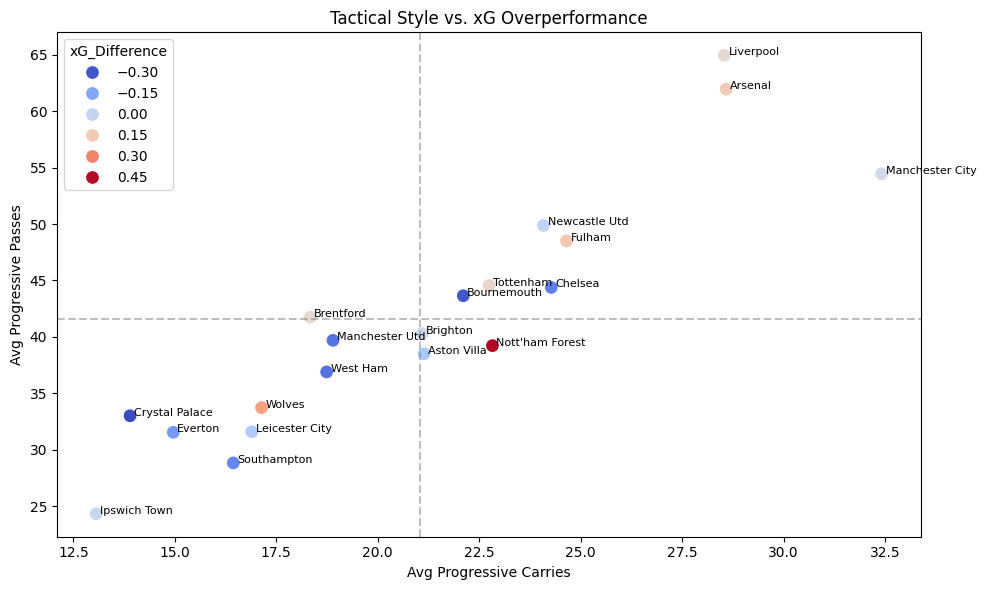

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=style_metrics,
    x='ProgressiveCarries',
    y='ProgressivePasses',
    hue='xG_Difference',
    palette='coolwarm',
    s=100
)

for i, row in style_metrics.iterrows():
    plt.text(row['ProgressiveCarries'] + 0.1, row['ProgressivePasses'], row['Club'], fontsize=8)

plt.title('Tactical Style vs. xG Overperformance')
plt.xlabel('Avg Progressive Carries')
plt.ylabel('Avg Progressive Passes')
plt.axhline(style_metrics['ProgressivePasses'].mean(), linestyle='--', color='grey', alpha=0.5)
plt.axvline(style_metrics['ProgressiveCarries'].mean(), linestyle='--', color='grey', alpha=0.5)
plt.tight_layout()
plt.show()


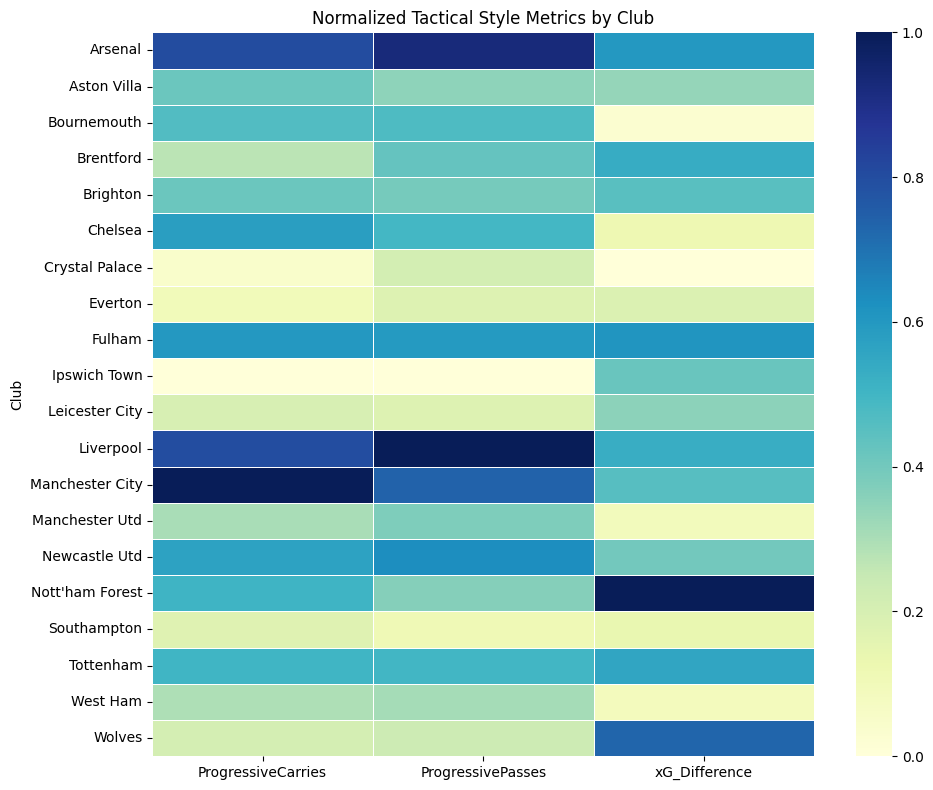

In [54]:
style_norm = style_metrics.set_index('Club').copy()
style_norm = (style_norm - style_norm.min()) / (style_norm.max() - style_norm.min())  # normalize for comparison

plt.figure(figsize=(10, 8))
sns.heatmap(style_norm, annot=False, cmap='YlGnBu', linewidths=0.5)
plt.title('Normalized Tactical Style Metrics by Club')
plt.tight_layout()
plt.show()

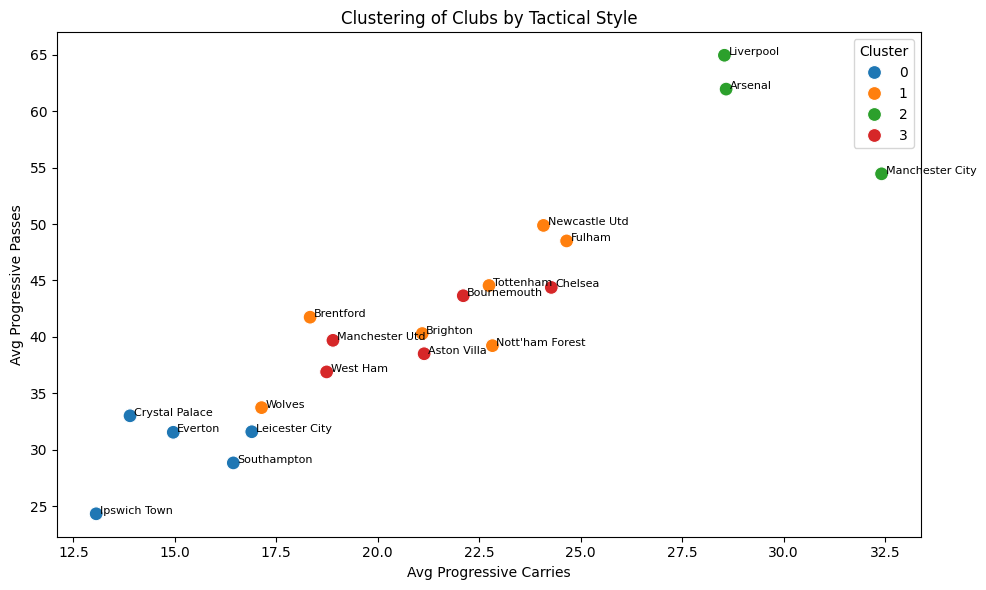

,Club,ProgressiveCarries,ProgressivePasses,xG_Difference,Cluster
9,Ipswich Town,13.062500,24.312500,0.006250,0
16,Southampton,16.441176,28.823529,-0.211765,0
10,Leicester City,16.896552,31.586207,-0.044828,0
6,Crystal Palace,13.896552,33.000000,-0.320690,0
7,Everton,14.961538,31.538462,-0.176923,0
17,Tottenham,22.741935,44.548387,0.112903,1
15,Nott'ham Forest,22.826087,39.217391,0.456522,1
14,Newcastle Utd,24.083333,49.875000,-0.008333,1
19,Wolves,17.137931,33.724138,0.248276,1
4,Brighton,21.096774,40.290323,0.029032,1


In [57]:
X = style_metrics[['ProgressiveCarries', 'ProgressivePasses', 'xG_Difference']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
style_metrics['Cluster'] = kmeans.fit_predict(X_scaled)

# STEP 4: Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=style_metrics,
    x='ProgressiveCarries',
    y='ProgressivePasses',
    hue='Cluster',
    palette='tab10',
    s=100
)

# Label clubs
for i, row in style_metrics.iterrows():
    plt.text(row['ProgressiveCarries'] + 0.1, row['ProgressivePasses'], row['Club'], fontsize=8)

plt.title('Clustering of Clubs by Tactical Style')
plt.xlabel('Avg Progressive Carries')
plt.ylabel('Avg Progressive Passes')
plt.tight_layout()
plt.show()

#display clustered table
style_metrics[['Club', 'ProgressiveCarries', 'ProgressivePasses', 'xG_Difference', 'Cluster']]\
    .sort_values('Cluster')\
    .head(10)

#### 2.Which player archetypes exist in the league based on attacking contribution, and how can these clusters inform recruitment or tactical substitutions?

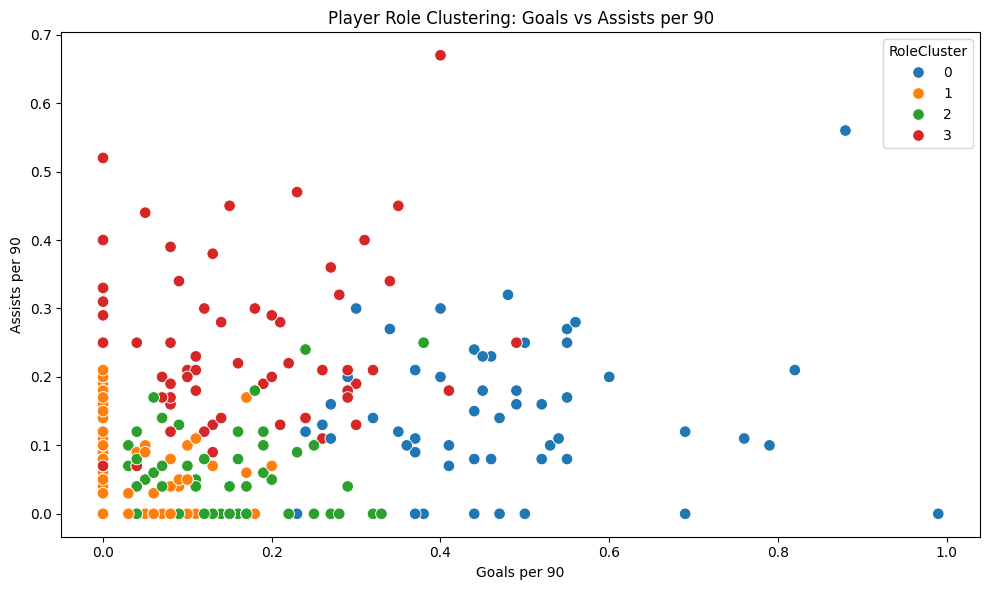

,Player,Club,Goals_Total_per90,xG_Total_per90,Assists_Total_per90,xAG_Total_per90,ProgressiveCarries,ProgressivePasses,GoalConversion,xG_Difference,RoleCluster
244,Nicolas Jackson,Chelsea,0.44,0.56,0.24,0.20,43,30,0.769231,-2.7,0
413,Marcus Rashford,Manchester Utd,0.37,0.16,0.09,0.19,20,21,2.352941,2.3,0
277,Justin Kluivert,Bournemouth,0.56,0.46,0.28,0.22,64,88,1.212121,2.1,0
402,Jaden Philogene Bidace,Ipswich Town,0.38,0.38,0.00,0.05,13,10,1.000000,0.0,0
68,David Brooks,Bournemouth,0.23,0.25,0.00,0.19,25,26,0.909091,-0.2,0
71,Facundo Buonanotte,Leicester City,0.26,0.23,0.13,0.20,37,49,1.111111,0.4,0
534,Danny Welbeck,Brighton,0.45,0.41,0.23,0.06,17,35,1.111111,0.8,0
390,Dango Ouattara,Bournemouth,0.37,0.41,0.21,0.26,67,36,0.909091,-0.7,0
184,Cody Gakpo,Liverpool,0.49,0.37,0.18,0.21,40,46,1.333333,2.0,0
385,Paul Onuachu,Southampton,0.41,0.33,0.10,0.05,7,12,1.250000,0.8,0


In [60]:
features = [
    'Goals_Total_per90',
    'xG_Total_per90',
    'Assists_Total_per90',
    'xAG_Total_per90',
    'ProgressiveCarries',
    'ProgressivePasses',
    'GoalConversion',
    'xG_Difference'
]

# Filter for players with meaningful minutes
player_data = df[df['MatchesPlayed_90s'] >= 5].copy()
X = player_data[features].fillna(0)

# Step 2: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
player_data['RoleCluster'] = kmeans.fit_predict(X_scaled)

# Step 4: Visualize roles (2D projection for simplicity)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=player_data,
    x='Goals_Total_per90',
    y='Assists_Total_per90',
    hue='RoleCluster',
    palette='tab10',
    s=70
)

plt.title('Player Role Clustering: Goals vs Assists per 90')
plt.xlabel('Goals per 90')
plt.ylabel('Assists per 90')
plt.tight_layout()
plt.show()

# Optional: View sample of clustered players
player_data[['Player', 'Club'] + features + ['RoleCluster']].sort_values('RoleCluster').head(15)

In [58]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=player_data,
    x='Goals_Total_per90',
    y='Assists_Total_per90',
    hue='RoleCluster',
    palette='tab10',
    s=80
)
plt.title('Player Role Clustering: Goals vs Assists per 90')
plt.xlabel('Goals per 90')
plt.ylabel('Assists per 90')
plt.axhline(0.2, linestyle='--', color='gray', alpha=0.5)
plt.axvline(0.2, linestyle='--', color='gray', alpha=0.5)
plt.tight_layout()
plt.show()


NameError: name 'player_data' is not defined

<Figure size 1000x600 with 0 Axes>